In [4]:
import os
import cv2
import numpy as np
from time import time
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
train_dir = 'data/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
test_dir = 'data/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

NameError: name 'plt' is not defined

In [2]:
def load_data(train_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in os.listdir(train_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data(train_dir)
print('Loading:', time() - start)

NameError: name 'time' is not defined

In [7]:
classes = 29
batch = 128
epochs = 3
learning_rate = 0.0001

def results(model):
  adam = Adam(lr=learning_rate)

  model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

  start = time()
  history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
  train_time = time() - start

  model.summary()

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

  start = time()
  test_loss, test_acc = model.evaluate(x_test, y_test)
  test_time = time() - start
  print('\nTrain time: ', train_time)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)
  print('Test time: ', test_time)

58892288/58889256 [==============================] - 6s 0us/step
Epoch 1/3
551/551 [==============================] - 4250s 8s/step - loss: 0.4530 - accuracy: 0.8739 - val_loss: 0.0597 - val_accuracy: 0.9821
Epoch 2/3
551/551 [==============================] - 4189s 8s/step - loss: 0.0597 - accuracy: 0.9817 - val_loss: 0.0197 - val_accuracy: 0.9940
Epoch 3/3
551/551 [==============================] - 4187s 8s/step - loss: 0.0262 - accuracy: 0.9924 - val_loss: 0.0258 - val_accuracy: 0.9920
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
________________________

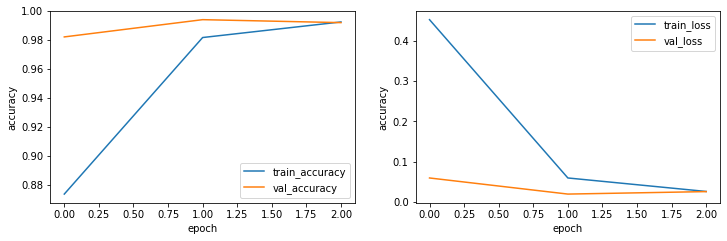

272/272 [==============================] - 44s 163ms/step - loss: 0.0333 - accuracy: 0.9895

Train time:  12651.679334878922
Test accuracy: 0.9895402193069458
Test loss: 0.033294256776571274
Test time:  44.528342723846436


In [8]:
model = Sequential()

model.add(VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3)))

model.add(Flatten())

model.add(Dense(512, activation='sigmoid'))

model.add(Dense(29, activation='softmax'))

results(model)